In [163]:
import numpy as np
import pandas as pd

import os, sys
import random
import sklearn

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [157]:
flip_probs = [0.2, 0.2, 0.3, 0.5, 0.6]
mushrooms_data = data.MushroomsDataProvider(resample=True, flip_probs=flip_probs, annotate_prob=0.7)

3916
4208


Iter 00, logit: -2.888308
Iter 20, logit: -2.705535
Iter 40, logit: -2.704476
Iter 60, logit: -2.703766
Iter 80, logit: -2.703292
[0.44747105 0.55252895]
---------------
Label accuracy is 0.8127404216033236
--------------------------------------------------
Data has 17 features
Iter 00, logit: -2.883965
Iter 20, logit: -2.572241
Iter 40, logit: -2.535879
Iter 60, logit: -2.521236
Iter 80, logit: -2.513704
(6499, 17)
Classifier train accuracy is 0.7645791660255424
(1625, 17)
Classifier test accuracy is 0.7446153846153846
Label accuracy is 0.8747499615325435
--------------------------------------------------
Data has 17 features
Iter 00, logit: -2.885615
Average Raykar weight is 0.6573127423520371
Iter 20, logit: -2.596555
Average Raykar weight is 0.596553010430129
Iter 40, logit: -2.554589
Average Raykar weight is 0.6113625288877004
Iter 60, logit: -2.542782
Average Raykar weight is 0.6160274227673931
Iter 80, logit: -2.539024
Average Raykar weight is 0.6181742511420201
Average Raykar w

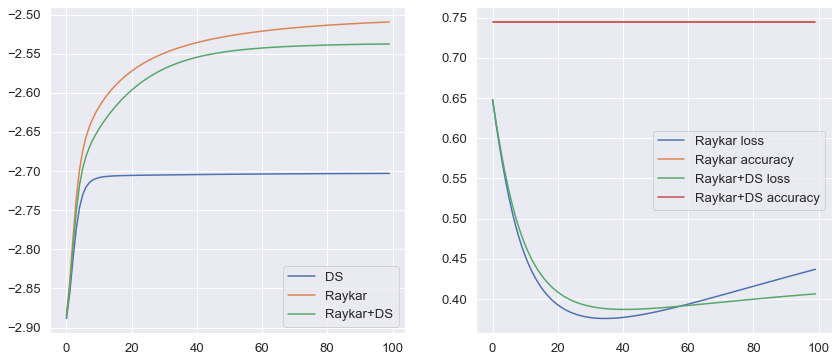

In [59]:
reload_all()
# 0.918
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=0.1)
bm.print_conf(mushrooms_methods)

Number of data points: 6499


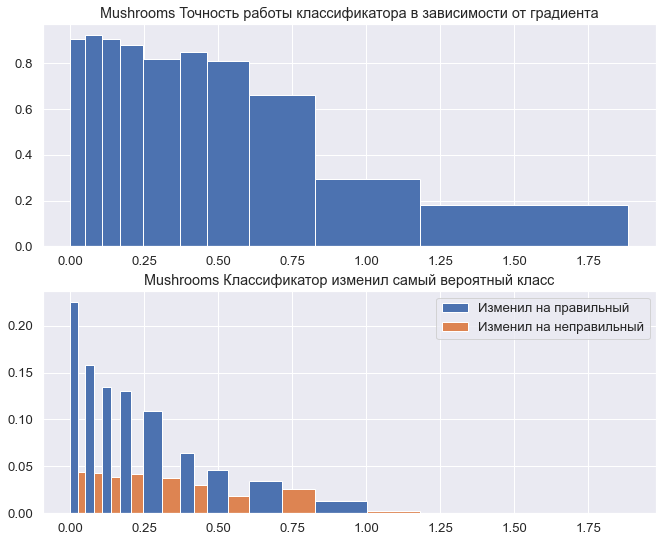

In [60]:
reload_all()
buckets, confidences, wrong, correct = bm.build_grad_hist(mushrooms_data, mushrooms_methods, mushroom_points, 'Mushrooms', 700)
condidence_mushrooms = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -2.888308
Iter 20, logit: -2.705535
Iter 40, logit: -2.704476
Iter 60, logit: -2.703766
Iter 80, logit: -2.703292
[0.44747105 0.55252895]
---------------
Label accuracy is 0.8127404216033236
--------------------------------------------------
Data has 17 features
Iter 00, logit: -2.883965
Iter 20, logit: -2.572241
Iter 40, logit: -2.535879
Iter 60, logit: -2.521236
Iter 80, logit: -2.513704
(6499, 17)
Classifier train accuracy is 0.7645791660255424
(1625, 17)
Classifier test accuracy is 0.7446153846153846
Label accuracy is 0.8747499615325435
--------------------------------------------------
Data has 17 features
Iter 00, logit: -2.885450
Average Raykar weight is 0.7059859405174378
Iter 20, logit: -2.570450
Average Raykar weight is 0.6942495896712587
Iter 40, logit: -2.525117
Average Raykar weight is 0.7041686274115614
Iter 60, logit: -2.513004
Average Raykar weight is 0.7060243549534982
Iter 80, logit: -2.509210
Average Raykar weight is 0.7060973983848859
Average Raykar 

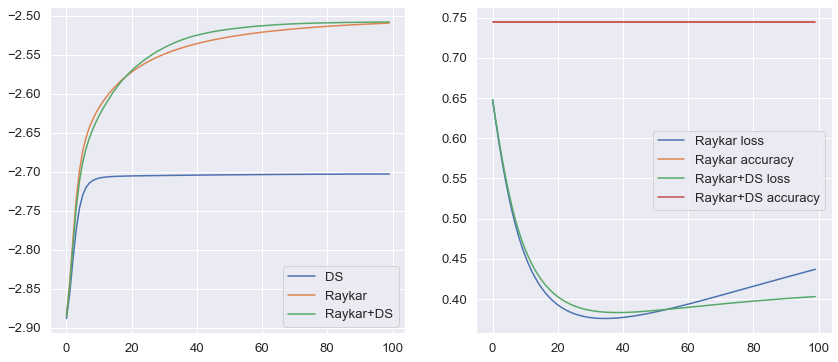

In [61]:
reload_all()
mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=100, lr=0.1, 
                                                                           confidence_estimator=condidence_mushrooms)
bm.print_conf(mushrooms_methods)

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_ds', 'Mushrooms')

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'conf_mx_r', 'Mushrooms')

In [ ]:
bm.plots_for_point(mushroom_points, mushrooms_data, mushrooms_methods, 6439)

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

In [ ]:
reload_all()
bm.plot_flips(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])], 
              mushroom_points[mushroom_points.task.isin(advantages_matrix[2][1])], 'mu_ds', 'Mushrooms', 'R beat DS', 'R beat RDS')

In [ ]:
def scatter_cls(pts):
    print(len(pts))
    am = np.array(list(map(lambda x: np.argmax(x), pts['classifier_r'])))
    r = np.array(list(map(lambda x: x.max(), pts['classifier_r'])))
    rds = np.array(list(map(lambda x: x.max(), pts['classifier_rds'])))
    r, rds = [], []
    for arg, x in zip(am, pts['classifier_r']):
        r.append(x[arg])
    for arg, x in zip(am, pts['classifier_rds']):
        rds.append(x[arg])
#     plt.scatter(r, rds)
    r = np.array(r)
    rds = np.array(rds)
    plt.hist(r * rds)
    
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])])

In [ ]:
scatter_cls(mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])

In [ ]:
res = []
for _, row in mushroom_points.iterrows():
    res.append(row.conf_mx_r + np.log(row.classifier_r) + np.log(row.classifier_rds))
res = np.array(res)
res = np.exp(res)
res = sklearn.preprocessing.normalize(res, axis=1, norm='l1')

estimates = {}
for i, row in mushroom_points.iterrows():
    estimates[row['task']] = mushrooms_methods[2].values[np.argmax(res[i])]

In [ ]:
all_points = 0
accepted = 0

for point in mushrooms_data.gold():
    if point.task in estimates:
        estimate = estimates[point.task]
        all_points += 1
        if point.value == estimate:
            accepted += 1

accuracy = accepted / all_points

In [ ]:
accuracy

In [ ]:
reload_all()
method = rb.RaykarWithBoosting()
method.fit(mushrooms_data.labels(), mushrooms_data.features(), max_iter=50)

In [ ]:
mushrooms_methods[-1].classifiers[0].w

In [ ]:
mushrooms_methods[-1].classifiers[1].w

In [ ]:
mushroom_points

In [ ]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])][:20]

In [ ]:
reload_all()

bm.boosting_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms', metric='minmax')  

In [ ]:
scatter_classifiers_distr(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                          mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])])  

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [ ]:
reload_all()
bm.plot_all_gradients(mushroom_points[mushroom_points.task.isin(advantages_matrix[1][0])],
                              mushroom_points[mushroom_points.task.isin(advantages_matrix[0][1])], 'Mushrooms') 

In [ ]:
mushrooms_data._features

In [ ]:
mushroom_points[mushroom_points.task.isin(advantages_matrix[1][2])]

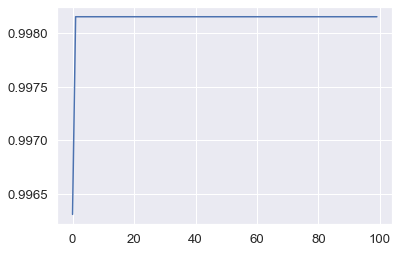

In [26]:
plt.plot(mushrooms_methods[2].accuracies)

In [ ]:
mushrooms_methods[2].accuracies

In [162]:
X_train, y_train = bm.features2np(mushrooms_data)

reg = LogisticRegression(max_iter=100, fit_intercept=False, C=100).fit(X_train, y_train)

X_test, y_test = mushrooms_data.test()

pred = reg.predict(X_train)
print(accuracy_score(y_train, pred))
pred = reg.predict(X_test)
print(accuracy_score(y_test, pred))
reg.coef_

1.0
1.0


array([[-8.40376791e-01, -5.50491704e-01,  2.13885039e-02,
         1.84839538e-01,  1.04427871e+00,  9.07757877e-02,
         2.36441105e-01, -3.49251004e-02, -1.20653564e+00,
         9.55433676e-01,  1.85146683e+00, -1.51689409e+00,
         4.82989900e-02, -4.10324186e-01,  5.20041167e-01,
        -1.60496366e+00,  7.02578178e-01,  7.02578178e-01,
        -8.06459455e-01,  4.64092087e-01, -1.87216923e+00,
         1.82258327e+00,  7.57292056e+00, -8.29706693e+00,
        -6.73877293e+00, -3.40652028e-02,  7.57292056e+00,
         6.99859280e+00, -3.83763312e+00, -1.61243499e+00,
        -1.67404670e+00,  1.37415052e-01, -1.87001012e-01,
        -2.15325479e+00,  2.10366883e+00,  3.94118359e+00,
        -3.99076955e+00, -3.30681468e+00,  1.09013206e+00,
         2.12594892e-01, -2.14283704e-02,  8.89441759e-01,
         4.98247798e-02,  9.17568123e-01,  7.50616259e-01,
        -1.09342393e+00,  3.02559780e-01,  1.53926255e-01,
         5.41710815e-03, -1.13686873e+00,  1.08728277e+0

In [78]:
X_test.shape

(1625, 17)

In [81]:
d = pd.read_csv('resources/datasets/data_banknote_authentication.txt', header=None)

In [88]:
X = d.drop([4], axis=1)
y = d[4]

In [135]:
reg = LogisticRegression(max_iter=100, fit_intercept=True).fit(X, y)

print(accuracy_score(y, reg.predict(X)))


0.897444996451384


/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [264]:
ds = sklearn.datasets.fetch_covtype()

In [265]:
X = ds['data'][::10]
y = ds['target'][::10]
print(y.max())

7


In [235]:
subset = np.logical_or(y == 1, y == 7)
y = y[subset]
X = X[subset]
X = MinMaxScaler().fit_transform(X)[:]

In [236]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)

reg = LogisticRegression(max_iter=2000, fit_intercept=True).fit(X_train, y_train)
print(accuracy_score(y_train, reg.predict(X_train)))
print(accuracy_score(y_test, reg.predict(X_test)))

0.9528829604130808
0.9145869191049913


In [237]:
X.shape

(23240, 54)

In [238]:
X[0].max()

1.0

In [239]:
sklearn.metrics.confusion_matrix(y_test, reg.predict(X_test))

array([[3918,  323],
       [  74,  333]])

In [303]:
X = ds['data'][::100]
y = ds['target'][::100]

In [304]:
a = 2
b = 1
cls2 = y == b
cls1 = np.argwhere(y == a)[:cls2.sum()].reshape(-1)
y = np.concatenate([y[cls1], y[cls2]])
X = np.vstack([X[cls1], X[cls2]])

In [305]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True)

reg = LogisticRegression(max_iter=2000, fit_intercept=True).fit(X_train, y_train)
print(accuracy_score(y_train, reg.predict(X_train)))
print(accuracy_score(y_test, reg.predict(X_test)))

0.8185434516523867
0.8251833740831296


/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [294]:
sklearn.metrics.confusion_matrix(y_test, reg.predict(X_test))

array([[288, 110],
       [101, 492]])

In [295]:
X_train.shape

(3960, 54)

In [299]:
(y == a).sum()

2043

In [302]:
mushrooms_data.gold()

[Estimation(task='0', value='1'),
 Estimation(task='1', value='2'),
 Estimation(task='2', value='2'),
 Estimation(task='3', value='1'),
 Estimation(task='4', value='2'),
 Estimation(task='5', value='2'),
 Estimation(task='6', value='2'),
 Estimation(task='7', value='2'),
 Estimation(task='8', value='1'),
 Estimation(task='9', value='2'),
 Estimation(task='10', value='2'),
 Estimation(task='11', value='2'),
 Estimation(task='12', value='2'),
 Estimation(task='13', value='1'),
 Estimation(task='14', value='2'),
 Estimation(task='15', value='2'),
 Estimation(task='16', value='2'),
 Estimation(task='17', value='1'),
 Estimation(task='18', value='1'),
 Estimation(task='19', value='1'),
 Estimation(task='20', value='2'),
 Estimation(task='21', value='1'),
 Estimation(task='22', value='2'),
 Estimation(task='23', value='2'),
 Estimation(task='24', value='2'),
 Estimation(task='25', value='1'),
 Estimation(task='26', value='2'),
 Estimation(task='27', value='2'),
 Estimation(task='28', value='